In [40]:
import numpy as np
import pandas as pd
import xarray as xr
import netCDF4
from erddapy import ERDDAP
import json

Configure the ERDDAP to search

In [41]:
ra = 'sccoos'

with open('utils/ra_erddaps.json') as f:
    urls = json.load(f)

server = urls[ra.lower()]

print(server)

e = ERDDAP(server=server, protocol="tabledap")

https://erddap.sccoos.org/erddap


Pull in the processed inventory

In [42]:
#
# df_cruise = df[df['Station Description'] == 'Chesapeake Bay WQ Cruise Data ']
#
#df_aws = df[df['Station ID'] == 'Humboldt']
# #url = 'http://tds.glos.us/thredds/dodsC/buoy_agg_standard/OMOECC_E1/OMOECC_E1.ncml'
# #url = 'http://tds.glos.us/thredds/dodsC/buoy_agg_standard/45186/45186.ncml'
# #url = 'http://tds.glos.us/thredds/dodsC/buoy_agg_standard/bgsusd2/bgsusd2.ncml'
# url = 'http://oos.soest.hawaii.edu/thredds/dodsC/hioos/nss/ns12agg'
# print(url)
# ds = xr.open_dataset(url)
# #ds = netCDF4.Dataset(url,'r')
# title = ds.title
# start_time = np.datetime_as_string(ds.time.min().values, unit='D')
# end_time = np.datetime_as_string(ds.time.max().values, unit='D')
# print('Duration: %s - %s' % (np.datetime_as_string(ds.time.min().values, unit='D'),
#                              np.datetime_as_string(ds.time.max().values, unit='D'))
#       )

# Try glos web server
# url = 'https://glbuoys.glos.us/tools/export?ftype=csv&data_type=buoy&units=eng&locs=OMOECC_E1&params=Water_Temperature_at_Surface|dissolved_oxygen_saturation|water_conductivity|ysi_turbidity&tperiod=custom&date_start=2020-01-01&date_end=2020-12-31&avg_ivld=none'
# df = erddapy.ERDDAP.to_pandas(url)

## using ERDDAP to look for stations
# check out http://data.glos.us/erddap/tabledap/allDatasets.htmlTable?datasetID%2Ctitle%2CminTime%2CmaxTime&maxTime%3E=2020-01-01&maxTime%3C=2020-12-31&orderBy(%22maxTime%22)
# that lists out all the GLOS stations with the maximum time of observations within the year 2020 (on their ERDDAP).

df = pd.read_excel('2022/data/processed/%s.xlsx' % ra.upper(), dtype=str)
df

,RA,Station ID,WMO ID or NWS/CMAN ID,Station Long Name,Station Description,Latitude (dec deg),Longitude (dec deg),Platform Type,"Station Deployment (mm/yyyy, yyyy, < 5 yr, > 5 yr)","Currently Operational? (Y, N, O, U)",Platform Funder/Sponsor,"RA Funding Involvement (Yf, Yp, N)",Platform Operator/Owner,Operator Sector,Platform Maintainer,Data Manager,"Variable Names + water column depth of measurement in meters [CF_name (# m, # m) or CF_name (mult) or CF_name (# depths)].",Additional notes
0,SCCOOS,NaN,TNWC1,Stearns Wharf,Automated Shore Station,34.4107,-119.6874,fixed,2005,Y,SCCOOS,Yf,UCSD,Academic,UCSD,Southern California Coastal Ocean Observing Sy...,"sea_water_temperature (2m), sea_water_pressure...",WMO ID In process. operated by Melissa Carter
1,SCCOOS,NaN,NaN,Santa Monica Pier,Automated Shore Station,34.0086,-118.4986,fixed,2005,Y,SCCOOS/City of LA/Santa Monica Bay Foundation,Yp,UCSD,Academic,UCSD,Southern California Coastal Ocean Observing Sy...,"sea_water_temperature (2m), sea_water_pressure...",WMO ID In process. operated by Melissa Carter
2,SCCOOS,NaN,NEWC1,Newport Pier,Automated Shore Station,33.6073,-117.9289,fixed,2005,Y,SCCOOS,Yf,UCSD,Academic,UCSD,Southern California Coastal Ocean Observing Sy...,"sea_water_temperature (2m), sea_water_pressure...",WMO ID In process. operated by Melissa Carter
3,SCCOOS,NaN,LJSC1,Scripps Pier,Automated Shore Station,32.867,-117.257,fixed,2005,Y,SCCOOS,Yf,UCSD,Academic,UCSD,Southern California Coastal Ocean Observing Sy...,"sea_water_temperature (2m), sea_water_pressure...",WMO ID In process. operated by Melissa Carter
4,SCCOOS,NaN,NaN,Cal Poly Pier,Harmful Algae Bloom monitoring program station,35.17,-120.741,sampling_location,2005,Y,SCCOOS,Yf,UCSD,Academic,Cal Poly,Southern California Coastal Ocean Observing Sy...,"sea_water_temperature, mass_concentration_of_c...",Data management under development haven't appl...
5,SCCOOS,NaN,NaN,Stearns Wharf,Harmful Algae Bloom monitoring program station,34.4107,-119.6874,sampling_location,2005,Y,SCCOOS,Yf,UCSD,Academic,UCSB,Southern California Coastal Ocean Observing Sy...,"sea_water_temperature, mass_concentration_of_c...",Data management under development haven't appl...
6,SCCOOS,NaN,NaN,Santa Monica Pier,Harmful Algae Bloom monitoring program station,34.0086,-118.4986,sampling_location,2005,Y,SCCOOS,Yf,UCSD,Academic,UCLA,Southern California Coastal Ocean Observing Sy...,"sea_water_temperature, mass_concentration_of_c...",Data management under development haven't appl...
7,SCCOOS,NaN,NaN,Newport Pier,Harmful Algae Bloom monitoring program station,33.6073,-117.9289,sampling_location,2005,Y,SCCOOS,Yf,UCSD,Academic,USC,Southern California Coastal Ocean Observing Sy...,"sea_water_temperature, mass_concentration_of_c...",Data management under development haven't appl...
8,SCCOOS,NaN,NaN,Scripps Pier,Harmful Algae Bloom monitoring program station,32.867,-117.257,sampling_location,2005,Y,SCCOOS,Yf,UCSD,Academic,UCSD,Southern California Coastal Ocean Observing Sy...,"sea_water_temperature, mass_concentration_of_c...",Data management under development haven't appl...
9,SCCOOS,NaN,NaN,Scripps Pier,OAH Monitoring,32.867,-117.257,sampling_location,2022,Y,SCCOOS,Yf,UCSD,Academic,UCSD,Southern California Coastal Ocean Observing Sy...,"pH, dissolved_oxygen, temperature, conductivit...",Todd Martz Self-Calibrating SeapHOx


Search the ERDDAP server for a single station of interest - more of a test

In [43]:
# df['Station ID'].loc[df['Station ID'].isna()] = df.loc[df['Station ID'].isna(),'Dataset ID']

# df['Station ID']

In [44]:
# df_wf = df[df['Station ID'] == 'Jug_Bay']

# # for SCCOOS need to search for 'Station Long Name' as 'Station ID' is NA for most entries
# search_for = df_wf['Station ID'].to_string()

# search_url = e.get_search_url(search_for=search_for, response="csv")

# try:
#     resp = pd.read_csv(search_url)
#     print(resp['Station ID'])
# except:
#     pass

Rip through all the datasets in the inventory and see if they exist on the RA erddap. Process checks the following order:

1. `Station ID`, then 
2. `Station Long Name`, then
3. `WMO ID or NWS/CMAN ID`

We first check if the value is `nan`. If so, we punt as that will return all datasets from the ERDDAP service.

In [45]:
not_found = []
found = dict()

exclude = ' -gliders'

#search_order = ['Station ID', 'Station Long Name', 'WMO ID or NWS/CMAN ID']

# SCCOOS
search_order = ['Station Long Name', 'WMO ID or NWS/CMAN ID', 'Station Description']

for search1 in df[search_order[0]].astype(str):
    
    if search1 == "nan":
        print("punting with %s = nan\n" % search_order[0])
        not_found.append(search1)
        continue
    
    try:
        print('searching \"%s\" = \"%s\"' % (search_order[0], search1))
        search_url = e.get_search_url(search_for=search1+exclude, response="csv")
        resp = pd.read_csv(search_url)
        
        print("Found \"%s\": %s" % (search1,resp['Dataset ID'].values.tolist()))
        
        found[search1] = {'Dataset ID': resp['Dataset ID'].values.tolist()}
        
    except:
        
        print('no dataset matching \"%s\"' % search1)
        search2 = df.loc[df[search_order[0]] == search1, search_order[1]].values.tolist()[0]
        
        if search2 == "nan":
                print("punting with %s = nan\n" % search_order[1])
                not_found.append(search1)
                continue
                
        try:
            
            print('searching \"%s\" = \"%s\"' % (search_order[1], search2))
            search_url = e.get_search_url(search_for=search2+exclude, response="csv")
            resp = pd.read_csv(search_url)
            print("Found \"%s\": %s" % (search2,resp['Dataset ID'].values.tolist()))
            
            found[search1] = {'Dataset ID': resp['Dataset ID'].values.tolist()}
            
        except:

            search3 = str(df.loc[df[search_order[0]] == search1, search_order[2]].values.tolist()[0])
            
            if search3 == "nan":
                print("punting with \"%s\" = nan\n" % search_order[2])
                not_found.append(search1)
                continue
            
            try:
                print('searching \"%s\" = \"%s\"' % (search_order[2], search3))
                search_url = e.get_search_url(search_for=search3+exclude, response="csv")
                resp = pd.read_csv(search_url)
                print("Found \"%s\": %s" % (search3,resp['Dataset ID'].values.tolist()))
                
                found[search1] = {'Dataset ID': resp['Dataset ID'].values.tolist()}
                
            except:
                print("Couldn't find:", [search1, search2, search3])
                not_found.append(search1)
        
    print("\n")

searching "Station Long Name" = "Stearns Wharf"
Found "Stearns Wharf": ['HABs-StearnsWharf', 'SPATT-StearnsWharf', 'autoss']


searching "Station Long Name" = "Santa Monica Pier"
Found "Santa Monica Pier": ['HABs-SantaMonicaPier']


searching "Station Long Name" = "Newport Pier"
Found "Newport Pier": ['HABs-NewportBeachPier', 'SPATT-NewportBeachPier']


searching "Station Long Name" = "Scripps Pier"
Found "Scripps Pier": ['HABs-ScrippsPier', 'spc_hab_daily', 'autoss']


searching "Station Long Name" = "Cal Poly Pier"
Found "Cal Poly Pier": ['HABs-CalPolyPier', 'HABs-SantaMonicaPier', 'HABs-ScrippsPier', 'HABs-TrinidadPier', 'HABs-NewportBeachPier', 'spc_hab_daily', 'HABs-Humboldt', 'HABs-SantaCruzWharf', 'HABs-HumboldtSouthBay', 'HABs-BodegaMarineLab', 'HABs-InnerTomalesBay', 'HABs-TomalesBayMouth', 'HABs-BodegaMarineLabBuoy', 'HABs-TomalesBayMid-ChannelBuoy', 'HABs-MontereyWharf', 'HABs-StearnsWharf']


searching "Station Long Name" = "Stearns Wharf"
Found "Stearns Wharf": ['HABs-Stea

Print the stations that we couldn't find.

In [46]:
len(not_found)

5

In [47]:
len(found)

15

Show me the record that has NaN for the first search element.

In [48]:
df.loc[df[search_order[0]].isna()]

,RA,Station ID,WMO ID or NWS/CMAN ID,Station Long Name,Station Description,Latitude (dec deg),Longitude (dec deg),Platform Type,"Station Deployment (mm/yyyy, yyyy, < 5 yr, > 5 yr)","Currently Operational? (Y, N, O, U)",Platform Funder/Sponsor,"RA Funding Involvement (Yf, Yp, N)",Platform Operator/Owner,Operator Sector,Platform Maintainer,Data Manager,"Variable Names + water column depth of measurement in meters [CF_name (# m, # m) or CF_name (mult) or CF_name (# depths)].",Additional notes


Now show me the stations, with identifiers, that we couldn't find.

In [49]:
df[df[search_order[0]].isin(not_found)]

,RA,Station ID,WMO ID or NWS/CMAN ID,Station Long Name,Station Description,Latitude (dec deg),Longitude (dec deg),Platform Type,"Station Deployment (mm/yyyy, yyyy, < 5 yr, > 5 yr)","Currently Operational? (Y, N, O, U)",Platform Funder/Sponsor,"RA Funding Involvement (Yf, Yp, N)",Platform Operator/Owner,Operator Sector,Platform Maintainer,Data Manager,"Variable Names + water column depth of measurement in meters [CF_name (# m, # m) or CF_name (mult) or CF_name (# depths)].",Additional notes
10,SCCOOS,NaN,NaN,Agua Hedionda Lagoon near Carlsbad Aquafarm,Burkeolator,33.139,-117.339,fixed,2014,N,OAP/SCCOOS,Yf,OSU,Academic,UCSD,Southern California Coastal Ocean Observing Sy...,"total_alkalinity (1 m) CO2 (1 m), dissolved_in...",operated by Todd Martz
11,SCCOOS,NaN,NaN,Agua Hedionda Lagoon near Carlsbad Aquafarm,ACDC Gen 2,33.139,-117.339,fixed,2018,N,OAP/SCCOOS,Yf,UW,Academic,UCSD,Southern California Coastal Ocean Observing Sy...,pCO2 (2 m),operated by Todd Martz
12,SCCOOS,NaN,NaN,Agua Hedionda Lagoon near Carlsbad Aquafarm,SeapHOx,33.139,-117.339,fixed,2018-04-01 00:00:00,N,OAP/SCCOOS,Yp,UCSD,Academic,UCSD,Southern California Coastal Ocean Observing Sy...,"pH, dissolved_oxygen, temperature, conductivit...","operated by Todd Martz. pH, dissolved oxygen, ..."
13,SCCOOS,NaN,NaN,Catalina Sea Ranch - NOMAD Buoy,ACDC Gen 1,33.3628,-118.0628,buoy,2019,N,OAP/SCCOOS,Yf,UCSD,Academic,UCSD,Southern California Coastal Ocean Observing Sy...,pCO2,operated by Todd Martz
24,SCCOOS,NaN,NaN,Observing nutrient fluxes and their role in HA...,Wirewalker Profiling System,32.938,-117.326,mooring,2020,N,SCCOOS,Yp,UCSD,Academic,UCSD,Andrew Lucas Lab,"sea_water_temperature (2 m 100 m), sea_water_...","Operated by Lucas, Davis, Send"


Print out all the dataset IDs for the datasets that matched our criteria.

In [50]:
found

{'Stearns Wharf': {'Dataset ID': ['HABs-StearnsWharf',
   'SPATT-StearnsWharf',
   'autoss']},
 'Santa Monica Pier': {'Dataset ID': ['HABs-SantaMonicaPier']},
 'Newport Pier': {'Dataset ID': ['HABs-NewportBeachPier',
   'SPATT-NewportBeachPier']},
 'Scripps Pier': {'Dataset ID': ['HABs-ScrippsPier',
   'spc_hab_daily',
   'autoss']},
 'Cal Poly Pier': {'Dataset ID': ['HABs-CalPolyPier',
   'HABs-SantaMonicaPier',
   'HABs-ScrippsPier',
   'HABs-TrinidadPier',
   'HABs-NewportBeachPier',
   'spc_hab_daily',
   'HABs-Humboldt',
   'HABs-SantaCruzWharf',
   'HABs-HumboldtSouthBay',
   'HABs-BodegaMarineLab',
   'HABs-InnerTomalesBay',
   'HABs-TomalesBayMouth',
   'HABs-BodegaMarineLabBuoy',
   'HABs-TomalesBayMid-ChannelBuoy',
   'HABs-MontereyWharf',
   'HABs-StearnsWharf']},
 '2': {'Dataset ID': ['O2-Newport',
   'spc_hab_daily',
   'delmar_salinity',
   'delmar_temperature',
   'pH-AHL',
   'roms_fcst',
   'HABs-Humboldt',
   'HABs-CalPolyPier',
   'HABs-ScrippsPier',
   'HABs-Trinida

Check if each found dataset has coverage for specified CY

In [51]:
valid_datasets = []

cy = '2022'

for key in found:
    
    dataset_id = found[key]['Dataset ID']
    
    if len(dataset_id)>1:
        
        for dataset in dataset_id:
            
            e.dataset_id = dataset
    
            e.constraints = {
                 "time>=": "{}-01-01".format(cy)
            }
        
            e.variables = ['time']
    
            try:
                df_data = e.to_pandas(parse_dates=True)
                valid_datasets.extend([key])
                
            except:
                pass

                #print("No data for 2021 for %s: dataset ID %s" % (key,e.dataset_id))

    else:
        
        e.dataset_id = dataset_id[0]
    
        e.constraints = {
                         "time>=": "{}-01-01".format(cy)
                        }
        
        e.variables = ['time']
        
        try:
            
            df_data = e.to_pandas(parse_dates=True)

            valid_datasets.extend([key])

        except:
            pass

            #print("No data for 2021 for %s: dataset ID %s" % (key,e.dataset_id))

            
#for valid in sorted(set(valid_datasets)):
    
#     # drop qc vars
#     cols = [c for c in df_data.columns if 'qc' not in c]
#     cols = [c for c in cols if 'QARTOD' not in c]

#     df_data = df_data[cols]

#     # set index for plotting
#     df_data = df_data.set_index(df_data['time (UTC)'])

#     # plot
#     #df_data.plot(subplots=True, title=e.dataset_id,figsize=(20,20))

#     start_time = df_data['time (UTC)'].min()
#     end_time = df_data['time (UTC)'].max()

#     print('Dataset %s' % e.dataset_id)
#     print('Duration: %s - %s' % (start_time, end_time))

no_cov_datasets = found.keys() - sorted(set(valid_datasets))

print('Datasets without coverage for {}:\n{}'.format(cy,no_cov_datasets))

Datasets without coverage for 2022:
set()


Show me the inventory metadata about the invalid stations:

In [52]:
bad_stations = df.loc[(df[search_order[0]].isin(no_cov_datasets)) | df[search_order[0]].isin(not_found)]

df['erddap_not_avail'] = df[search_order[0]].isin(bad_stations[search_order[0]])

df.loc[df['erddap_not_avail']]

,RA,Station ID,WMO ID or NWS/CMAN ID,Station Long Name,Station Description,Latitude (dec deg),Longitude (dec deg),Platform Type,"Station Deployment (mm/yyyy, yyyy, < 5 yr, > 5 yr)","Currently Operational? (Y, N, O, U)",Platform Funder/Sponsor,"RA Funding Involvement (Yf, Yp, N)",Platform Operator/Owner,Operator Sector,Platform Maintainer,Data Manager,"Variable Names + water column depth of measurement in meters [CF_name (# m, # m) or CF_name (mult) or CF_name (# depths)].",Additional notes,erddap_not_avail
10,SCCOOS,NaN,NaN,Agua Hedionda Lagoon near Carlsbad Aquafarm,Burkeolator,33.139,-117.339,fixed,2014,N,OAP/SCCOOS,Yf,OSU,Academic,UCSD,Southern California Coastal Ocean Observing Sy...,"total_alkalinity (1 m) CO2 (1 m), dissolved_in...",operated by Todd Martz,True
11,SCCOOS,NaN,NaN,Agua Hedionda Lagoon near Carlsbad Aquafarm,ACDC Gen 2,33.139,-117.339,fixed,2018,N,OAP/SCCOOS,Yf,UW,Academic,UCSD,Southern California Coastal Ocean Observing Sy...,pCO2 (2 m),operated by Todd Martz,True
12,SCCOOS,NaN,NaN,Agua Hedionda Lagoon near Carlsbad Aquafarm,SeapHOx,33.139,-117.339,fixed,2018-04-01 00:00:00,N,OAP/SCCOOS,Yp,UCSD,Academic,UCSD,Southern California Coastal Ocean Observing Sy...,"pH, dissolved_oxygen, temperature, conductivit...","operated by Todd Martz. pH, dissolved oxygen, ...",True
13,SCCOOS,NaN,NaN,Catalina Sea Ranch - NOMAD Buoy,ACDC Gen 1,33.3628,-118.0628,buoy,2019,N,OAP/SCCOOS,Yf,UCSD,Academic,UCSD,Southern California Coastal Ocean Observing Sy...,pCO2,operated by Todd Martz,True
24,SCCOOS,NaN,NaN,Observing nutrient fluxes and their role in HA...,Wirewalker Profiling System,32.938,-117.326,mooring,2020,N,SCCOOS,Yp,UCSD,Academic,UCSD,Andrew Lucas Lab,"sea_water_temperature (2 m 100 m), sea_water_...","Operated by Lucas, Davis, Send",True


Invert the `erddap_not_avail` column and drop it.

In [53]:
df['erddap_avail'] = ~df['erddap_not_avail']

df.drop(columns='erddap_not_avail', inplace=True)

df

,RA,Station ID,WMO ID or NWS/CMAN ID,Station Long Name,Station Description,Latitude (dec deg),Longitude (dec deg),Platform Type,"Station Deployment (mm/yyyy, yyyy, < 5 yr, > 5 yr)","Currently Operational? (Y, N, O, U)",Platform Funder/Sponsor,"RA Funding Involvement (Yf, Yp, N)",Platform Operator/Owner,Operator Sector,Platform Maintainer,Data Manager,"Variable Names + water column depth of measurement in meters [CF_name (# m, # m) or CF_name (mult) or CF_name (# depths)].",Additional notes,erddap_avail
0,SCCOOS,NaN,TNWC1,Stearns Wharf,Automated Shore Station,34.4107,-119.6874,fixed,2005,Y,SCCOOS,Yf,UCSD,Academic,UCSD,Southern California Coastal Ocean Observing Sy...,"sea_water_temperature (2m), sea_water_pressure...",WMO ID In process. operated by Melissa Carter,True
1,SCCOOS,NaN,NaN,Santa Monica Pier,Automated Shore Station,34.0086,-118.4986,fixed,2005,Y,SCCOOS/City of LA/Santa Monica Bay Foundation,Yp,UCSD,Academic,UCSD,Southern California Coastal Ocean Observing Sy...,"sea_water_temperature (2m), sea_water_pressure...",WMO ID In process. operated by Melissa Carter,True
2,SCCOOS,NaN,NEWC1,Newport Pier,Automated Shore Station,33.6073,-117.9289,fixed,2005,Y,SCCOOS,Yf,UCSD,Academic,UCSD,Southern California Coastal Ocean Observing Sy...,"sea_water_temperature (2m), sea_water_pressure...",WMO ID In process. operated by Melissa Carter,True
3,SCCOOS,NaN,LJSC1,Scripps Pier,Automated Shore Station,32.867,-117.257,fixed,2005,Y,SCCOOS,Yf,UCSD,Academic,UCSD,Southern California Coastal Ocean Observing Sy...,"sea_water_temperature (2m), sea_water_pressure...",WMO ID In process. operated by Melissa Carter,True
4,SCCOOS,NaN,NaN,Cal Poly Pier,Harmful Algae Bloom monitoring program station,35.17,-120.741,sampling_location,2005,Y,SCCOOS,Yf,UCSD,Academic,Cal Poly,Southern California Coastal Ocean Observing Sy...,"sea_water_temperature, mass_concentration_of_c...",Data management under development haven't appl...,True
5,SCCOOS,NaN,NaN,Stearns Wharf,Harmful Algae Bloom monitoring program station,34.4107,-119.6874,sampling_location,2005,Y,SCCOOS,Yf,UCSD,Academic,UCSB,Southern California Coastal Ocean Observing Sy...,"sea_water_temperature, mass_concentration_of_c...",Data management under development haven't appl...,True
6,SCCOOS,NaN,NaN,Santa Monica Pier,Harmful Algae Bloom monitoring program station,34.0086,-118.4986,sampling_location,2005,Y,SCCOOS,Yf,UCSD,Academic,UCLA,Southern California Coastal Ocean Observing Sy...,"sea_water_temperature, mass_concentration_of_c...",Data management under development haven't appl...,True
7,SCCOOS,NaN,NaN,Newport Pier,Harmful Algae Bloom monitoring program station,33.6073,-117.9289,sampling_location,2005,Y,SCCOOS,Yf,UCSD,Academic,USC,Southern California Coastal Ocean Observing Sy...,"sea_water_temperature, mass_concentration_of_c...",Data management under development haven't appl...,True
8,SCCOOS,NaN,NaN,Scripps Pier,Harmful Algae Bloom monitoring program station,32.867,-117.257,sampling_location,2005,Y,SCCOOS,Yf,UCSD,Academic,UCSD,Southern California Coastal Ocean Observing Sy...,"sea_water_temperature, mass_concentration_of_c...",Data management under development haven't appl...,True
9,SCCOOS,NaN,NaN,Scripps Pier,OAH Monitoring,32.867,-117.257,sampling_location,2022,Y,SCCOOS,Yf,UCSD,Academic,UCSD,Southern California Coastal Ocean Observing Sy...,"pH, dissolved_oxygen, temperature, conductivit...",Todd Martz Self-Calibrating SeapHOx,True


Make a plot of all points and color based on ERDDAP available or not.

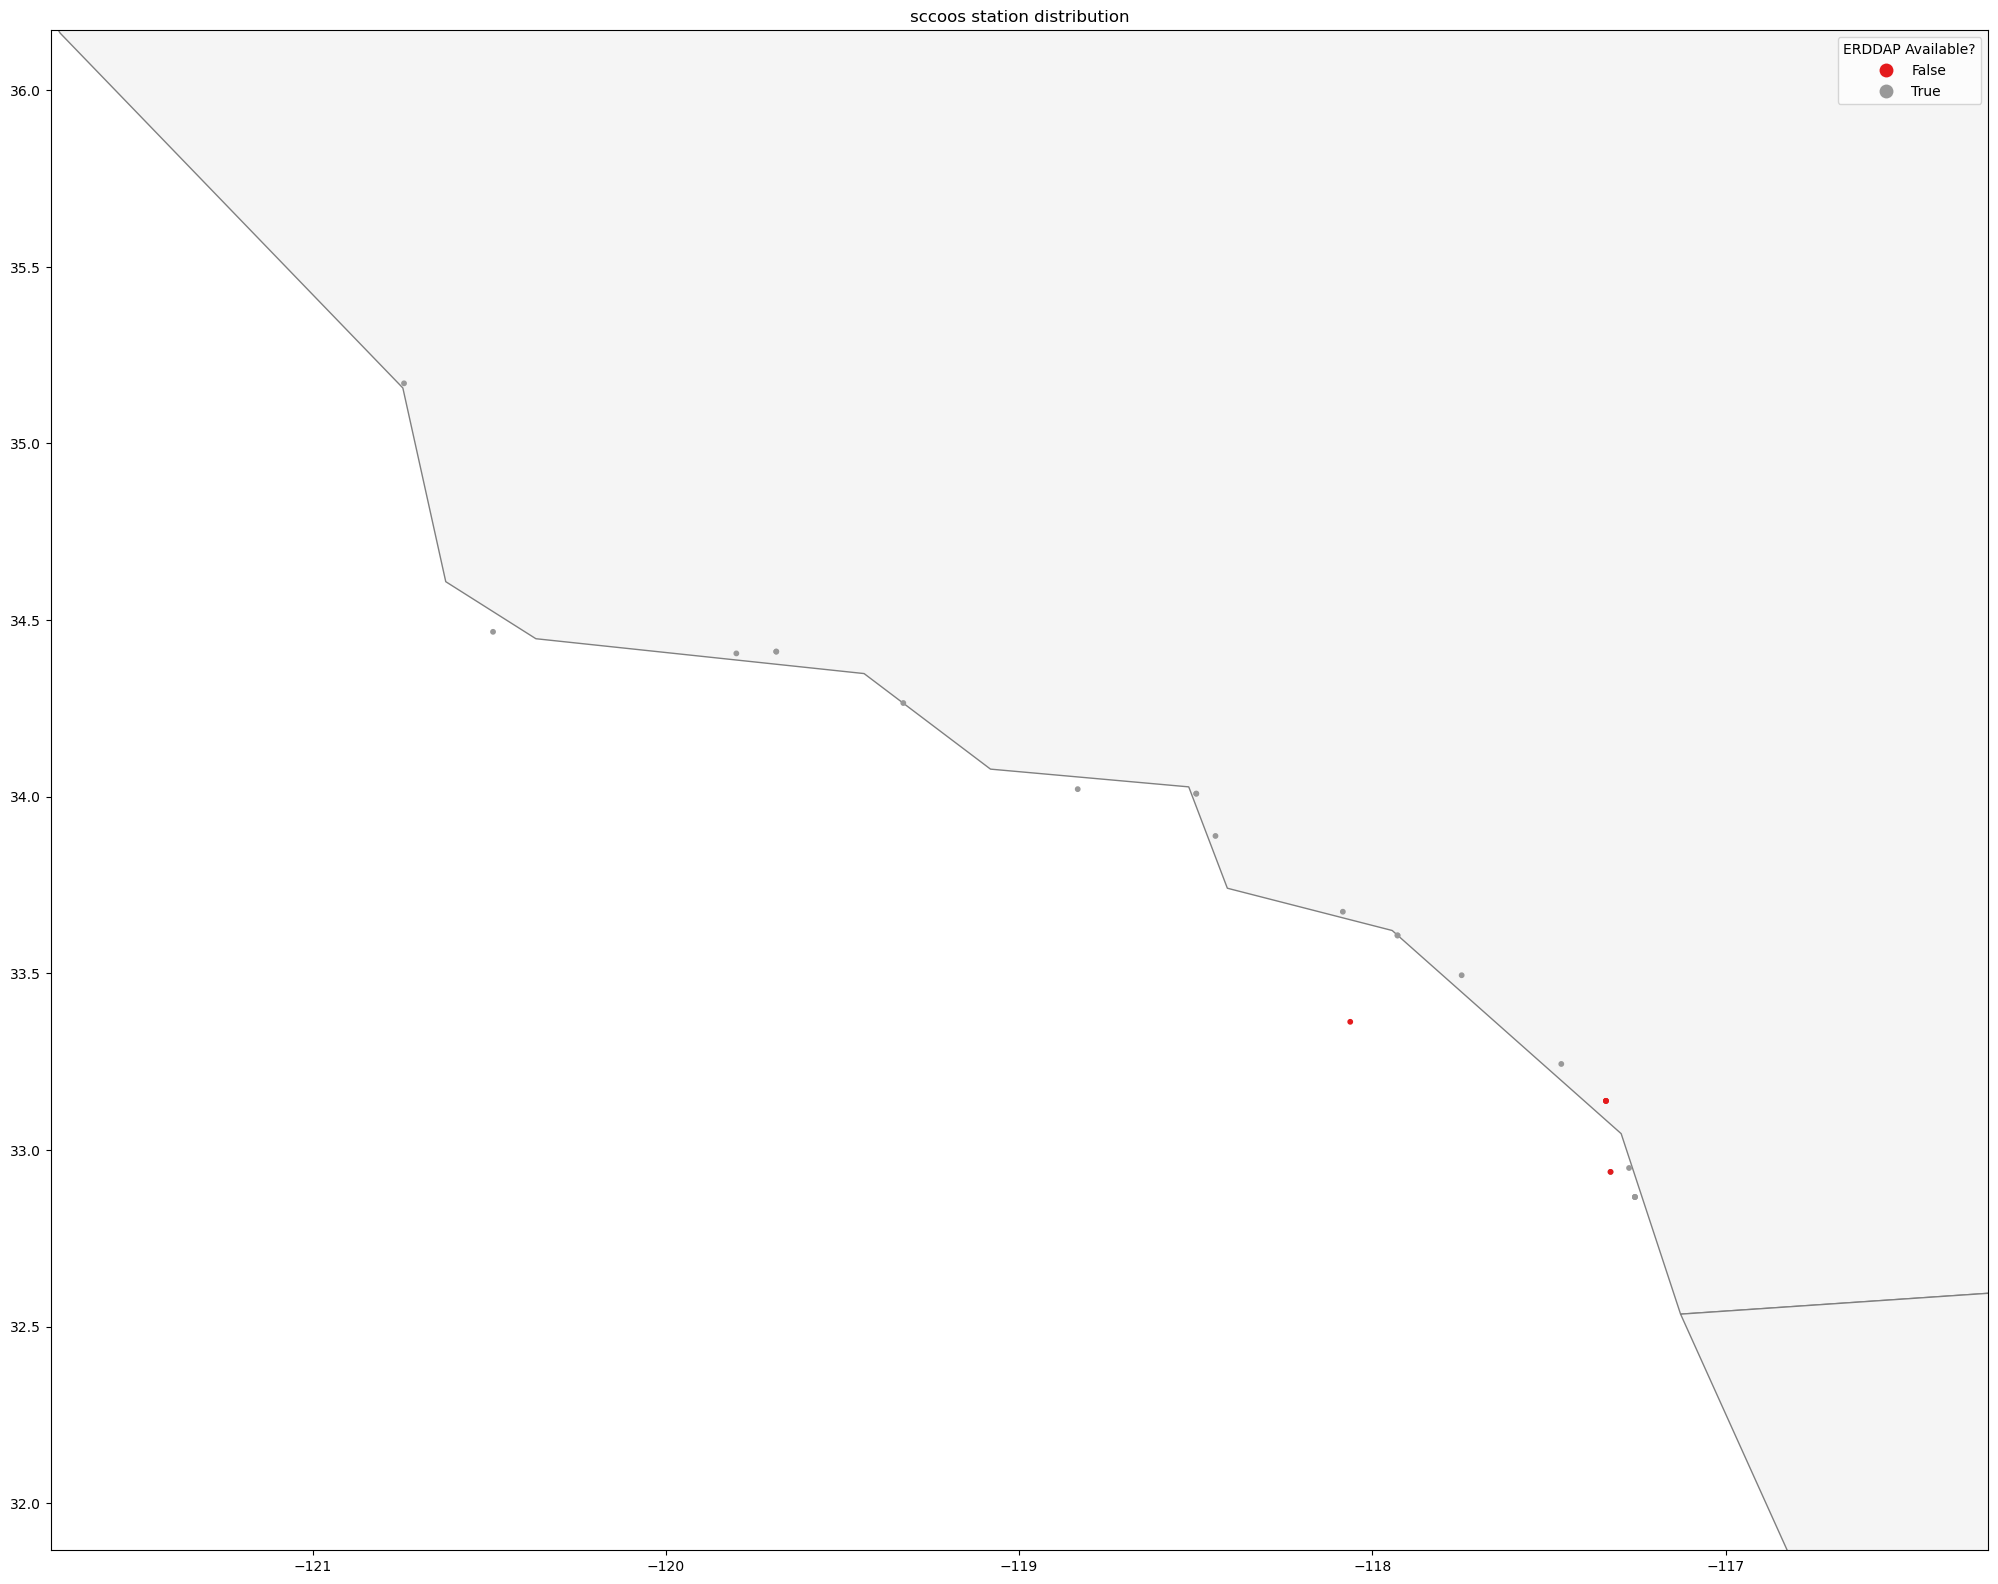

In [54]:
import geopandas
import matplotlib.pyplot as plt

#df = df.loc[df['']]

df.rename(columns=
{'Variable Names + water column depth of measurement in meters [CF_name (# m, # m) or CF_name (mult) or CF_name (# depths)].':
     'Variable Names',
 'Station Deployment (mm/yyyy, yyyy, < 5 yr, > 5 yr)': 'Station Deployment',
 'Longitude (dec deg)': 'Longitude',
 'Latitude (dec deg)': 'Latitude'},
              inplace=True)

df['Station Deployment'] = \
    df['Station Deployment'].astype(str)


gdf = geopandas.GeoDataFrame(
    df, geometry=geopandas.points_from_xy(df['Longitude'], df['Latitude']))

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

ax = world.plot(
    color='whitesmoke', 
    edgecolor='grey', 
    figsize=(25,20),
    )

gdf.plot( ax=ax,
         column='erddap_avail', 
         categorical=True, 
         cmap = 'Set1',
         markersize=10, 
         legend=True,
         legend_kwds={'title': "ERDDAP Available?"},
         k=2,
        )



minx, miny, maxx, maxy = gdf.total_bounds
ax.set_xlim(minx-1, maxx+1)
ax.set_ylim(miny-1, maxy+1)

plt.title('{} station distribution'.format(ra))

plt.show()

Make an interactive map.

When you click on a point the return is the information from the inventory.

In [55]:
gdf_final = gdf.set_crs(epsg=4326)

gdf_final.loc[~gdf_final['geometry'].is_empty == True].drop(columns='Variable Names').explore('erddap_avail',cmap = 'Set1')


## Show me some bad coordinates

_if there are any_

In [56]:
gdf_final.loc[gdf_final['geometry'].is_empty == True]

,RA,Station ID,WMO ID or NWS/CMAN ID,Station Long Name,Station Description,Latitude,Longitude,Platform Type,Station Deployment,"Currently Operational? (Y, N, O, U)",Platform Funder/Sponsor,"RA Funding Involvement (Yf, Yp, N)",Platform Operator/Owner,Operator Sector,Platform Maintainer,Data Manager,Variable Names,Additional notes,erddap_avail,geometry


In [57]:
# import urllib.request
# for url in gdf_final.loc[gdf_final['erddap_not_avail'],'Station Description'].str.replace('url: ',''):
#     print(url)
#     try:
#         urllib.request.urlopen(url).getcode()
#     except:
#         print("URL broken: %s" % url)
#         print(gdf_final.loc[gdf_final['Station Description'].str.contains(url,regex=False),'Station ID'])

# Show me the stations where ERDDAP doesn't exist or provide a valid response.

Reasons:
* Station not found on RA erddap
* dataset found but no data for this CY.

In [58]:
gdf_final.loc[~gdf_final['erddap_avail']]

,RA,Station ID,WMO ID or NWS/CMAN ID,Station Long Name,Station Description,Latitude,Longitude,Platform Type,Station Deployment,"Currently Operational? (Y, N, O, U)",Platform Funder/Sponsor,"RA Funding Involvement (Yf, Yp, N)",Platform Operator/Owner,Operator Sector,Platform Maintainer,Data Manager,Variable Names,Additional notes,erddap_avail,geometry
10,SCCOOS,NaN,NaN,Agua Hedionda Lagoon near Carlsbad Aquafarm,Burkeolator,33.139,-117.339,fixed,2014,N,OAP/SCCOOS,Yf,OSU,Academic,UCSD,Southern California Coastal Ocean Observing Sy...,"total_alkalinity (1 m) CO2 (1 m), dissolved_in...",operated by Todd Martz,False,POINT (-117.33900 33.13900)
11,SCCOOS,NaN,NaN,Agua Hedionda Lagoon near Carlsbad Aquafarm,ACDC Gen 2,33.139,-117.339,fixed,2018,N,OAP/SCCOOS,Yf,UW,Academic,UCSD,Southern California Coastal Ocean Observing Sy...,pCO2 (2 m),operated by Todd Martz,False,POINT (-117.33900 33.13900)
12,SCCOOS,NaN,NaN,Agua Hedionda Lagoon near Carlsbad Aquafarm,SeapHOx,33.139,-117.339,fixed,2018-04-01 00:00:00,N,OAP/SCCOOS,Yp,UCSD,Academic,UCSD,Southern California Coastal Ocean Observing Sy...,"pH, dissolved_oxygen, temperature, conductivit...","operated by Todd Martz. pH, dissolved oxygen, ...",False,POINT (-117.33900 33.13900)
13,SCCOOS,NaN,NaN,Catalina Sea Ranch - NOMAD Buoy,ACDC Gen 1,33.3628,-118.0628,buoy,2019,N,OAP/SCCOOS,Yf,UCSD,Academic,UCSD,Southern California Coastal Ocean Observing Sy...,pCO2,operated by Todd Martz,False,POINT (-118.06280 33.36280)
24,SCCOOS,NaN,NaN,Observing nutrient fluxes and their role in HA...,Wirewalker Profiling System,32.938,-117.326,mooring,2020,N,SCCOOS,Yp,UCSD,Academic,UCSD,Andrew Lucas Lab,"sea_water_temperature (2 m 100 m), sea_water_...","Operated by Lucas, Davis, Send",False,POINT (-117.32600 32.93800)


# Do some checking against the IOOS catalog

only for datasets that we couldn't find in ERDDAP (per above)

In [62]:
from ckanapi import RemoteCKAN
import xarray as xr

problem_datasets = []

ua = 'ckanapiioos/1.0 (+https://ioos.us/)'

#ioos_catalog = RemoteCKAN('https://data.ioos.us', user_agent=ua, get_only=True)
ioos_catalog = RemoteCKAN('https://data.ioos.us', user_agent=ua)
ioos_catalog

gdf_ckan = gdf_final.loc[~gdf_final['erddap_avail']]

#gdf_ckan['RA'] = 'GLOS'

#for station in gdf_ckan['Station ID'].dropna():
for station in gdf_ckan['Station Description'].dropna():

    ra = gdf_ckan.loc[gdf_ckan['Station Description']==station,'RA'].tolist()[0]
    #    ra = gdf_ckan.loc[gdf_ckan['Station ID']==station,'RA'].tolist()[0]
    
    print('RA "{}" + Station "{}"'.format(ra,station))

    fq = '+{}+{}'.format(station,ra)

    datasets = ioos_catalog.action.package_search(fq=fq)

    print('found {} dataset(s)'.format(datasets['count']))

    if datasets['count'] > 0:
        for dataset in datasets['results']:
            print('\t',dataset['title'])
            
            
            if dataset['resources']:
                print('\t',dataset['resources'][0]['url'])

                start_date = next(item for item in dataset["extras"] if item["key"] == "temporal-extent-begin")['value']
                end_date = next(item for item in dataset["extras"] if item["key"] == "temporal-extent-end")['value']

                print('\t','Coverage Meta:\n\t\t', start_date,' - ',end_date,'\n')

                if 'thredds' in dataset['resources'][0]['url']:
                    ds = xr.open_dataset(dataset['resources'][0]['url'])

                    time_max = ds.time.max().values

                    time_min = ds.time.min().values


                    print('\tCoverage Data:\n\t\t', time_min,' - ',time_max, '\n')

                    if pd.to_datetime(end_date) < pd.to_datetime(time_max, utc=True):
                        test_date = pd.to_datetime(time_max, utc=True)

                else:
                    test_date = pd.to_datetime(end_date, utc=True)

                if test_date > pd.to_datetime('{}-01-01'.format(cy), utc=True):
                    print('{} is valid.'.format(station))
                else:
                    print('{} is not valid.'.format(station))

                    problem_datasets.append(station)
            
            else:
                problem_datasets.append(station)
    else:
        problem_datasets.append(station)

RA "SCCOOS" + Station "Burkeolator"
found 0 dataset(s)
RA "SCCOOS" + Station "ACDC Gen 2"
found 0 dataset(s)
RA "SCCOOS" + Station "SeapHOx"
found 2 dataset(s)
	 SeapHOx sensor at Agua Hedionda Lagoon
	 https://erddap.sccoos.org/erddap/tabledap/pH-AHL
	 Coverage Meta:
		 2019-08-22T17:00:25Z  -  2021-01-06T05:04:48Z 

SeapHOx is not valid.
	 Scripps Pier Automated Shore Station with SeapHOx
	 https://erddap.cencoos.org/erddap/tabledap/scripps-pier-automated-shore-sta-1
	 Coverage Meta:
		 2013-01-18T22:29:25Z  -  2023-03-03T01:09:00Z 

SeapHOx is valid.
RA "SCCOOS" + Station "ACDC Gen 1"
found 0 dataset(s)
RA "SCCOOS" + Station "Wirewalker Profiling System  "
found 0 dataset(s)


Check the datasets that didn't have coverage in ERDDAP or through IOOS catalog and see if they are **Currently Operational?**

In [65]:
gdf_ckan.loc[gdf_ckan['Station Description'].isin(problem_datasets)]

,RA,Station ID,WMO ID or NWS/CMAN ID,Station Long Name,Station Description,Latitude,Longitude,Platform Type,Station Deployment,"Currently Operational? (Y, N, O, U)",Platform Funder/Sponsor,"RA Funding Involvement (Yf, Yp, N)",Platform Operator/Owner,Operator Sector,Platform Maintainer,Data Manager,Variable Names,Additional notes,erddap_avail,geometry
10,SCCOOS,NaN,NaN,Agua Hedionda Lagoon near Carlsbad Aquafarm,Burkeolator,33.139,-117.339,fixed,2014,N,OAP/SCCOOS,Yf,OSU,Academic,UCSD,Southern California Coastal Ocean Observing Sy...,"total_alkalinity (1 m) CO2 (1 m), dissolved_in...",operated by Todd Martz,False,POINT (-117.33900 33.13900)
11,SCCOOS,NaN,NaN,Agua Hedionda Lagoon near Carlsbad Aquafarm,ACDC Gen 2,33.139,-117.339,fixed,2018,N,OAP/SCCOOS,Yf,UW,Academic,UCSD,Southern California Coastal Ocean Observing Sy...,pCO2 (2 m),operated by Todd Martz,False,POINT (-117.33900 33.13900)
12,SCCOOS,NaN,NaN,Agua Hedionda Lagoon near Carlsbad Aquafarm,SeapHOx,33.139,-117.339,fixed,2018-04-01 00:00:00,N,OAP/SCCOOS,Yp,UCSD,Academic,UCSD,Southern California Coastal Ocean Observing Sy...,"pH, dissolved_oxygen, temperature, conductivit...","operated by Todd Martz. pH, dissolved oxygen, ...",False,POINT (-117.33900 33.13900)
13,SCCOOS,NaN,NaN,Catalina Sea Ranch - NOMAD Buoy,ACDC Gen 1,33.3628,-118.0628,buoy,2019,N,OAP/SCCOOS,Yf,UCSD,Academic,UCSD,Southern California Coastal Ocean Observing Sy...,pCO2,operated by Todd Martz,False,POINT (-118.06280 33.36280)
24,SCCOOS,NaN,NaN,Observing nutrient fluxes and their role in HA...,Wirewalker Profiling System,32.938,-117.326,mooring,2020,N,SCCOOS,Yp,UCSD,Academic,UCSD,Andrew Lucas Lab,"sea_water_temperature (2 m 100 m), sea_water_...","Operated by Lucas, Davis, Send",False,POINT (-117.32600 32.93800)


Print out the available metadata from the IOOS Catalog for the last dataset.

In [66]:
dataset

{'author': None,
 'author_email': None,
 'creator_user_id': 'bb55ba1f-9c92-4539-a676-e1fea85df891',
 'id': 'ca5a4977-9a1b-4178-9c34-bf7c2c850a77',
 'isopen': False,
 'license_id': None,
 'license_title': None,
 'maintainer': None,
 'maintainer_email': None,
 'metadata_created': '2023-01-18T05:18:16.834354',
 'metadata_modified': '2023-03-03T01:49:54.444305',
 'name': 'scripps-pier-automated-shore-station-with-seaphox',
 'notes': "Timeseries data from 'Scripps Pier Automated Shore Station with SeapHOx' (scripps-pier-automated-shore-sta-1)",
 'num_resources': 5,
 'num_tags': 30,
 'organization': {'id': '091f805a-7ab6-4d1c-8b06-1214dd5c99c6',
  'name': 'cencoos',
  'title': 'CeNCOOS',
  'type': 'organization',
  'description': 'The Central and Northern California Ocean Observing System (CeNCOOS) is one of eleven regional associations within the Integrated Ocean Observing System (IOOS) around the nation dedicated to the support of science in the service of marine ecosystem health and resou